<a href="https://colab.research.google.com/github/ZS4MLDL/learn_pytorch/blob/main/02_LinearRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

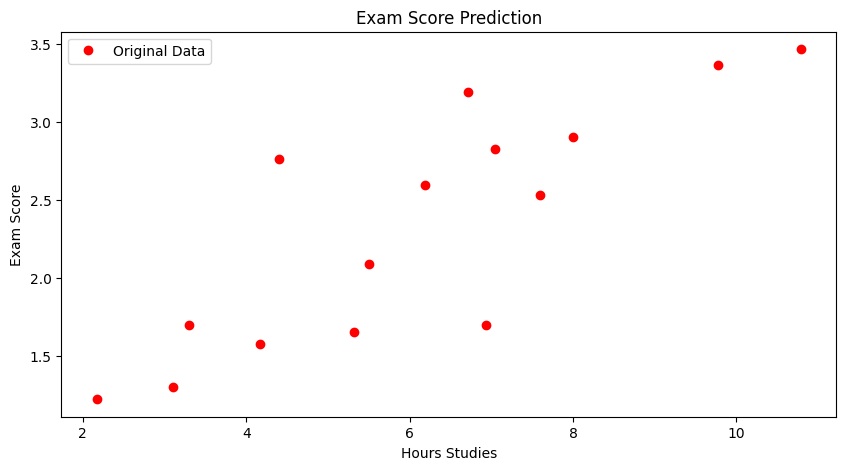

In [5]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train, y_train, "ro", label="Original Data")
plt.xlabel('Hours Studies')
plt.ylabel('Exam Score')
plt.legend()
plt.title("Exam Score Prediction")
plt.show()

In [6]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [11]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    out = self.linear(x)
    return out

In [12]:
model = LinearRegression()
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [14]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.7232]])),
             ('linear.bias', tensor([0.5046]))])

In [16]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.7232]], requires_grad=True),
 Parameter containing:
 tensor([0.5046], requires_grad=True)]

In [17]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [18]:
num_epochs = 1000
for epoch in range(num_epochs):
  model.train()
  out = model(x_train) #forward pass
  loss = criterion(out, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch +1 ) % 20 == 0:
    print(f"Epoch :[{epoch + 1}/ {num_epochs}], loss : {loss.item():.6f}")

Epoch :[20/ 1000], loss : 31.718700
Epoch :[40/ 1000], loss : 22.466938
Epoch :[60/ 1000], loss : 15.928304
Epoch :[80/ 1000], loss : 11.307159
Epoch :[100/ 1000], loss : 8.041190
Epoch :[120/ 1000], loss : 5.732982
Epoch :[140/ 1000], loss : 4.101669
Epoch :[160/ 1000], loss : 2.948746
Epoch :[180/ 1000], loss : 2.133924
Epoch :[200/ 1000], loss : 1.558052
Epoch :[220/ 1000], loss : 1.151057
Epoch :[240/ 1000], loss : 0.863415
Epoch :[260/ 1000], loss : 0.660125
Epoch :[280/ 1000], loss : 0.516451
Epoch :[300/ 1000], loss : 0.414910
Epoch :[320/ 1000], loss : 0.343145
Epoch :[340/ 1000], loss : 0.292426
Epoch :[360/ 1000], loss : 0.256580
Epoch :[380/ 1000], loss : 0.231246
Epoch :[400/ 1000], loss : 0.213340
Epoch :[420/ 1000], loss : 0.200685
Epoch :[440/ 1000], loss : 0.191741
Epoch :[460/ 1000], loss : 0.185420
Epoch :[480/ 1000], loss : 0.180952
Epoch :[500/ 1000], loss : 0.177793
Epoch :[520/ 1000], loss : 0.175561
Epoch :[540/ 1000], loss : 0.173983
Epoch :[560/ 1000], loss : 0

In [20]:
model.eval()
with torch.no_grad():
  pred = model(x_train)
pred.data.numpy()

array([[1.553957 ],
       [1.8551216],
       [2.1562862],
       [2.4875674],
       [2.5478   ],
       [1.7916032],
       [3.327817 ],
       [2.3430083],
       [2.728499 ],
       [1.2437574],
       [2.5784643],
       [3.6048884],
       [2.1050882],
       [2.83993  ],
       [1.4991996]], dtype=float32)

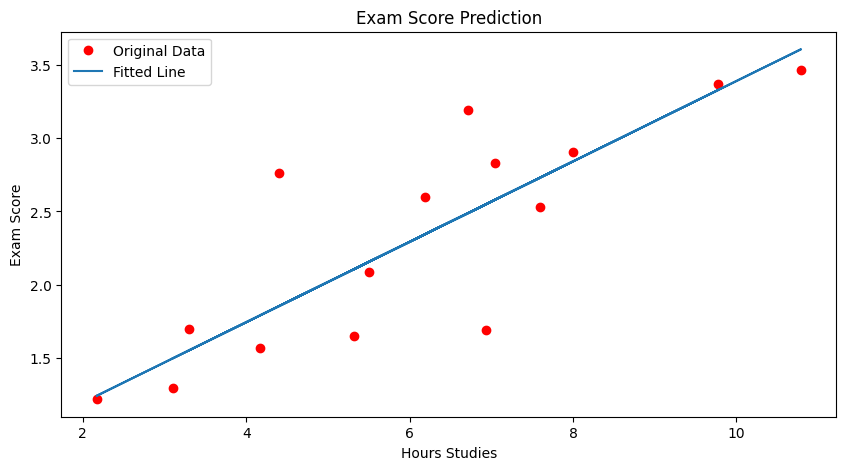

In [25]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), "ro", label="Original Data")
plt.plot(x_train.numpy(), pred, label="Fitted Line")
plt.xlabel('Hours Studies')
plt.ylabel('Exam Score')
plt.legend()
plt.title("Exam Score Prediction")
plt.show()

In [26]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.2738]])),
             ('linear.bias', tensor([0.6505]))])

In [32]:
studied_hours = 8.0
studied_hours = torch.tensor([[studied_hours]], dtype=torch.float32)

In [33]:
model.eval()
with torch.no_grad():
  pred_exam_score = model(conv_tensor)

print(pred_exam_score.item())


2.8407511711120605


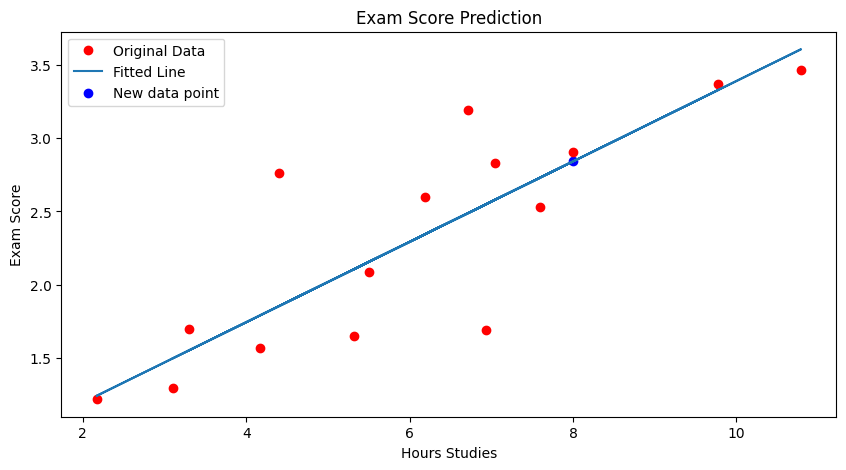

In [35]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), "ro", label="Original Data")
plt.plot(x_train.numpy(), pred, label="Fitted Line")
plt.scatter([studied_hours], [pred_exam_score.item()],color='blue', label="New data point")
plt.xlabel('Hours Studies')
plt.ylabel('Exam Score')
plt.legend()
plt.title("Exam Score Prediction")
plt.show()

In [36]:
torch.save(model.state_dict(),"./LinearRegression.pth")